In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("cosmeticsales.csv")

In [ ]:
df.head()

,Date,Item Name,Item Code,Category,Brand,Item Price,Quantity,Sales
0,2019-10-14,Shampoo,SHA009,Haircare,ERHA,80800,25,2020000
1,2019-07-24,Conditioner,CON010,Haircare,Krayolan,65000,8,520000
2,2019-02-02,Foundation,FND005,Makeup,YOU,43300,15,649500
3,2019-10-07,Cologne,COL014,Fragrance,Inez,51600,35,1806000
4,2019-03-16,Body Mist,BMS015,Fragrance,Ivan Gunawan,70100,15,1051500


In [ ]:
df.shape

(7000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        7000 non-null   object
 1   Item Name   7000 non-null   object
 2   Item Code   7000 non-null   object
 3   Category    7000 non-null   object
 4   Brand       7000 non-null   object
 5   Item Price  7000 non-null   int64 
 6   Quantity    7000 non-null   int64 
 7   Sales       7000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 437.6+ KB


In [ ]:
df.describe()

,Item Price,Quantity,Sales
count,7000.000000,7000.000000,7.000000e+03
mean,51137.857143,25.706000,1.309668e+06
std,28557.575535,14.459589,1.113454e+06
min,1000.000000,1.000000,1.600000e+03
25%,26500.000000,13.000000,3.847500e+05
50%,51700.000000,26.000000,9.963000e+05
75%,76125.000000,38.000000,1.982000e+06
max,100000.000000,50.000000,4.960000e+06


In [ ]:
df['Date'].nunique()

365

In [ ]:
df['Item Name'].nunique()

16

In [ ]:
df['Item Code'].nunique()

16

In [ ]:
df['Category'].nunique()

4

In [ ]:
df['Brand'].nunique()

16

In [ ]:
df['Category'].value_counts()

Category
Skincare     1811
Makeup       1769
Haircare     1713
Fragrance    1707
Name: count, dtype: int64

In [ ]:
df['Brand'].value_counts()

Brand
Loreal          474
Revlon          472
OMG             471
ERHA            458
YOU             452
Pink Flash      449
BNB             444
Ultima          440
Wardah          432
Maybelline      425
Some By Me      424
Ivan Gunawan    420
Make Over       414
Krayolan        409
Inez            408
Salsa           408
Name: count, dtype: int64

In [ ]:
df['Item Name'].value_counts()

Item Name
Serum                474
Sunscreen            472
Perfume              471
Shampoo              458
Foundation           452
Eyeshadow Palette    449
Lipstick             444
Moisturizer          440
Hair Mask            432
Cleanser             425
Mascara              424
Body Mist            420
Hair Oil             414
Conditioner          409
Cologne              408
Roll-On Perfume      408
Name: count, dtype: int64

In [ ]:
df['Item Code'].value_counts()

Item Code
SER004    474
SUN002    472
PER013    471
SHA009    458
FND005    452
ESP007    449
LIP006    444
MOI001    440
HMK011    432
CLE003    425
MAS008    424
BMS015    420
HOI012    414
CON010    409
COL014    408
ROP016    408
Name: count, dtype: int64

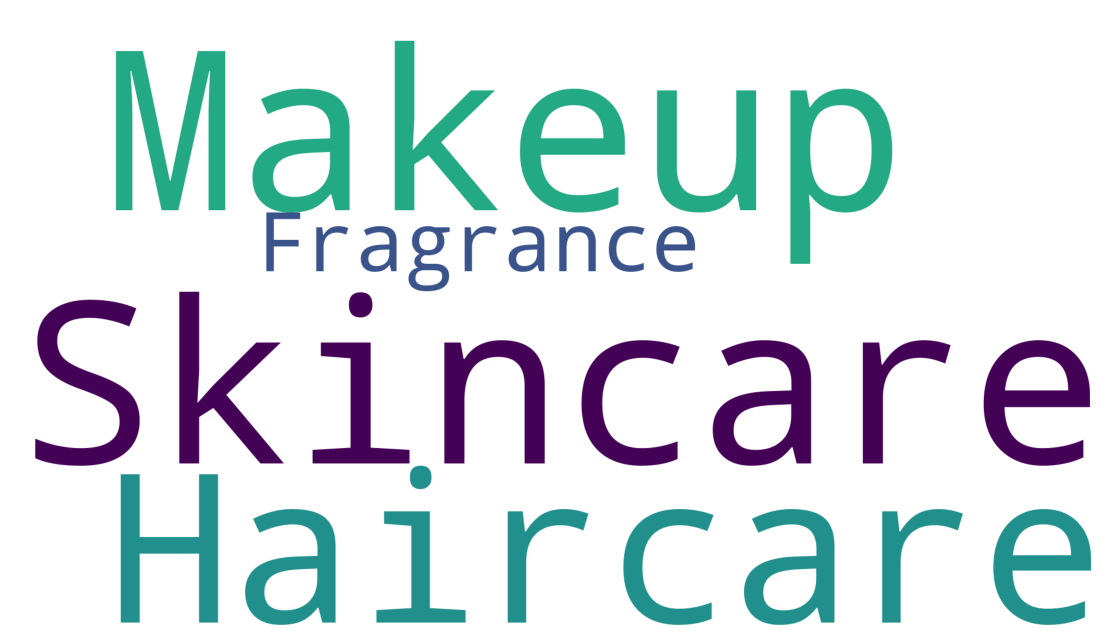

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Category']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [ ]:
df.isnull().sum()

Date          0
Item Name     0
Item Code     0
Category      0
Brand         0
Item Price    0
Quantity      0
Sales         0
dtype: int64

In [ ]:
df = df.dropna()

<Axes: xlabel='Date', ylabel='Sales'>

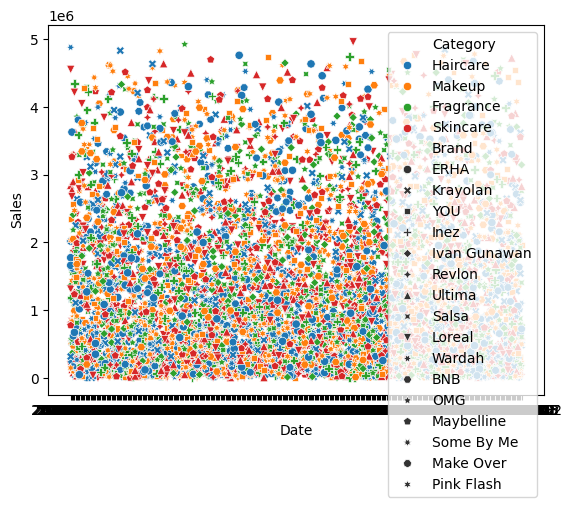

In [ ]:
sns.scatterplot(data=df, x='Date', y='Sales',hue='Category',style='Brand')

<Axes: xlabel='Sales'>

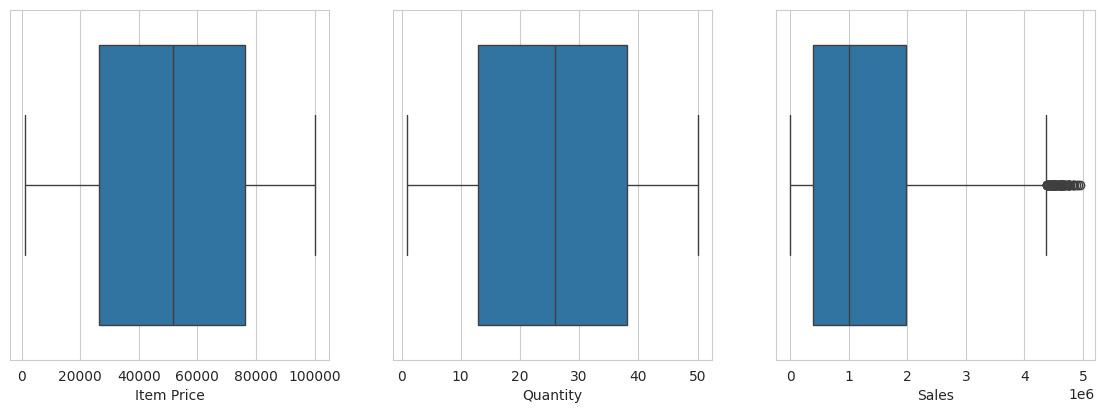

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Item Price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Sales',data=df)

<Axes: xlabel='Sales', ylabel='Density'>

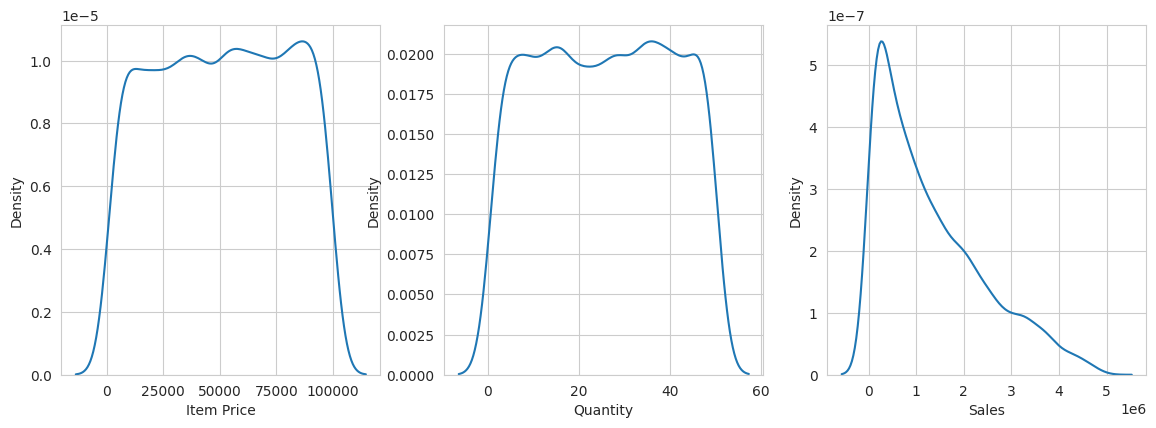

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Item Price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Sales',data=df)

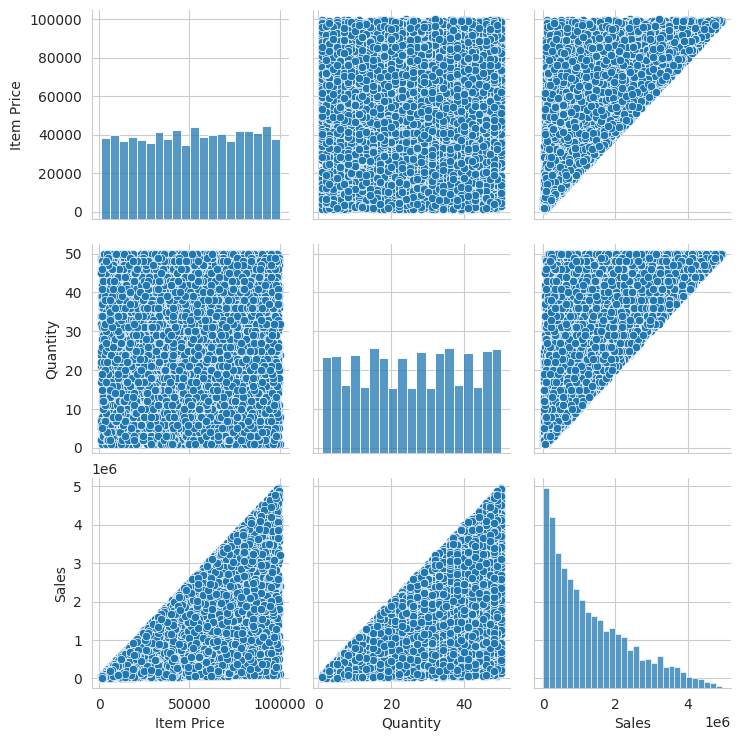

In [ ]:
sns.pairplot(data=df)

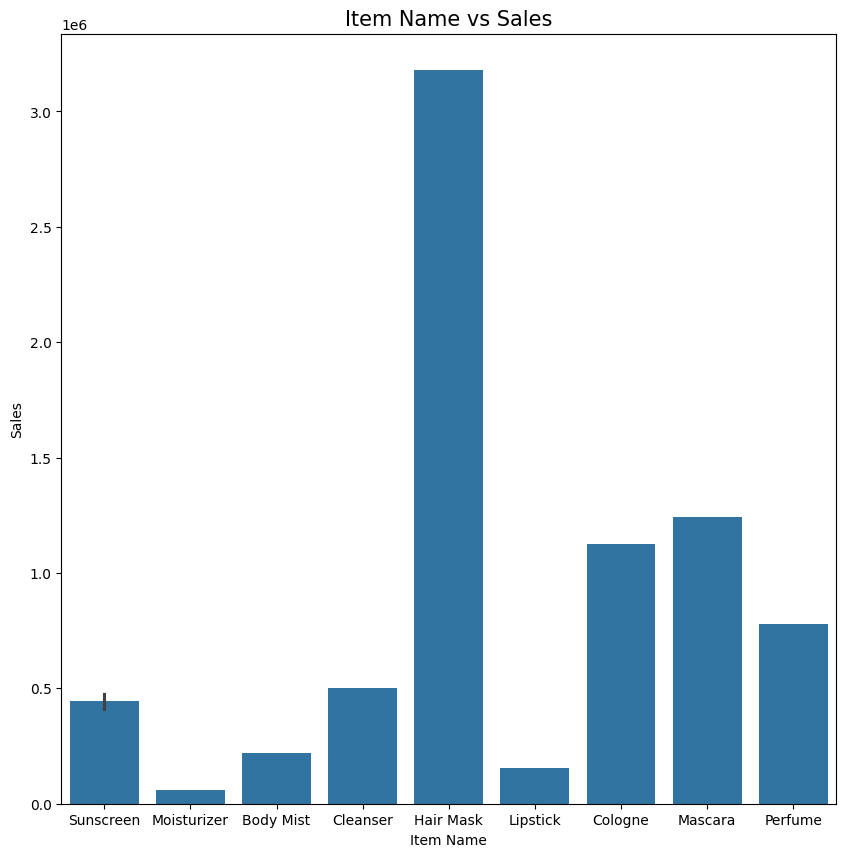

In [ ]:
plt.style.use("default")
plt.figure(figsize=(10,10))
sns.barplot(x="Item Name", y="Sales", data=df[170:180])
plt.title("Item Name vs Sales",fontsize=15)
plt.xlabel("Item Name")
plt.ylabel("Sales")
plt.show()

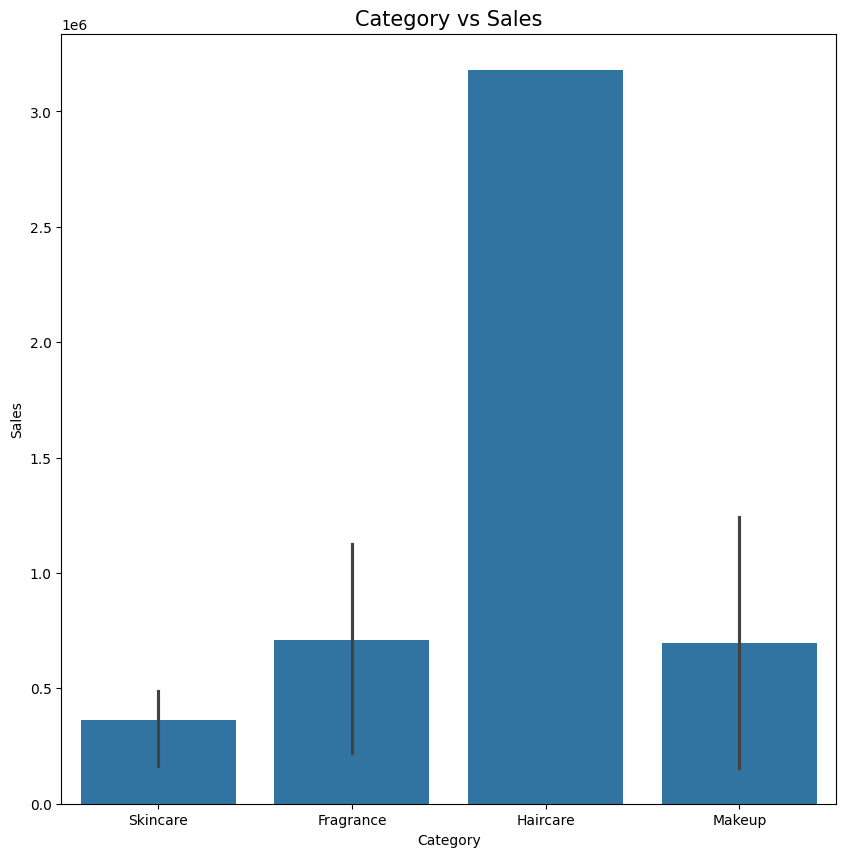

In [ ]:
plt.style.use("default")
plt.figure(figsize=(10,10))
sns.barplot(x="Category", y="Sales", data=df[170:180])
plt.title("Category vs Sales",fontsize=15)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [ ]:
df

,Date,Item Name,Item Code,Category,Brand,Item Price,Quantity,Sales
0,2019-10-14,Shampoo,SHA009,Haircare,ERHA,80800,25,2020000
1,2019-07-24,Conditioner,CON010,Haircare,Krayolan,65000,8,520000
2,2019-02-02,Foundation,FND005,Makeup,YOU,43300,15,649500
3,2019-10-07,Cologne,COL014,Fragrance,Inez,51600,35,1806000
4,2019-03-16,Body Mist,BMS015,Fragrance,Ivan Gunawan,70100,15,1051500
...,...,...,...,...,...,...,...,...
6995,2019-04-17,Cleanser,CLE003,Skincare,Maybelline,61200,40,2448000
6996,2019-01-05,Serum,SER004,Skincare,Loreal,64500,34,2193000
6997,2019-06-09,Roll-On Perfume,ROP016,Fragrance,Salsa,28500,8,228000
6998,2019-07-08,Hair Oil,HOI012,Haircare,Make Over,26100,42,1096200


In [ ]:
selected_features = ['Item Name', 'Brand', 'Item Price', 'Sales']
df_selected = df[selected_features]

In [ ]:
x = df[['Item Name', 'Brand', 'Item Price']]
y = df['Sales']

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_encoded = encoder.fit_transform(x[['Item Name', 'Brand']])
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(['Item Name', 'Brand']))
x_processed = pd.concat([x_encoded_df, x[['Item Price']].reset_index(drop=True)], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, random_state=0, test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train[['Item Price']] = scaler.fit_transform(x_train[['Item Price']])
x_test[['Item Price']] = scaler.transform(x_test[['Item Price']])

In [ ]:
x_train_dt = x_train[['Item Price']]
x_test_dt = x_test[['Item Price']]

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train[['Item Price']], y_train)

KNeighborsRegressor()

In [ ]:
y_pred_train = knn_reg.predict(x_train[['Item Price']])

In [ ]:
y_pred_test = knn_reg.predict(x_test[['Item Price']])

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train_rf = rf_reg.predict(x_train)
r2score_train_rf = r2_score(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)

In [ ]:
y_pred_test_rf = rf_reg.predict(x_test)
r2score_test_rf = r2_score(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_train_gb = gb_reg.predict(x_train)

r2score_train_gb = r2_score(y_train, y_pred_train_gb)
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
training_score_train_gb = gb_reg.score(x_train, y_train)

In [ ]:
y_pred_test_gb = gb_reg.predict(x_test)

r2score_test_gb = r2_score(y_test, y_pred_test_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
testing_score_gb = gb_reg.score(x_test, y_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred_train_lin = lin_reg.predict(x_train)

r2score_train_lin = r2_score(y_train, y_pred_train_lin)
mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
mae_train_lin = mean_absolute_error(y_train, y_pred_train_lin)
training_score_train_lin = lin_reg.score(x_train, y_train)

In [ ]:
y_pred_test_lin = lin_reg.predict(x_test)

r2score_test_lin = r2_score(y_test, y_pred_test_lin)
mse_test_lin = mean_squared_error(y_test, y_pred_test_lin)
mae_test_lin = mean_absolute_error(y_test, y_pred_test_lin)
training_score_test_lin = lin_reg.score(x_test, y_test)

In [ ]:
print("KNN Training")
print("R2 Score                   :", r2_score(y_train, y_pred_train))
print("Mean Squared Error (MSE)   :", mean_squared_error(y_train, y_pred_train))
print("Mean Absolute Error (MAE)  :", mean_absolute_error(y_train, y_pred_train))
print("Training Score             :", knn_reg.score(x_train[['Item Price']], y_train) * 100)
print()

print("KNN Testing")
print("R2 Score                   :", r2_score(y_test, y_pred_test))
print("Mean Squared Error (MSE)   :", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error (MAE)  :", mean_absolute_error(y_test, y_pred_test))
print("Testing Score              :", knn_reg.score(x_test[['Item Price']], y_test) * 100)
print()

print("Decision Tree Regressor (Training):")
print("R-squared Score            :", r2score_train_dt)
print("Mean Squared Error         :", mse_train_dt)
print("Mean Absolute Error        :", mae_train_dt)
print("Training Score             :", training_score_train_dt)
print()

print("Decision Tree Regressor (Testing):")
print("R-squared Score            :", r2score_test_dt)
print("Mean Squared Error         :", mse_test_dt)
print("Mean Absolute Error        :", mae_test_dt)
print("Testing Score              :", training_score_test_dt)
print()

print("Random Forest Regressor (Training):")
print("R-squared Score            :", r2score_train_rf)
print("Mean Squared Error         :", mse_train_rf)
print("Mean Absolute Error        :", mae_train_rf)
print()

print("Random Forest Regressor (Testing):")
print("R-squared Score            :", r2score_test_rf)
print("Mean Squared Error         :", mse_test_rf)
print("Mean Absolute Error        :", mae_test_rf)
print()

print("Gradient Boosting Regressor (Training):")
print("R-squared Score            :", r2score_train_gb)
print("Mean Squared Error         :", mse_train_gb)
print("Mean Absolute Error        :", mae_train_gb)
print("Training Score             :", training_score_train_gb)
print()

print("Gradient Boosting Regressor (Testing):")
print("R-squared Score            :", r2score_test_gb)
print("Mean Squared Error         :", mse_test_gb)
print("Mean Absolute Error        :", mae_test_gb)
print("Testing Score              :", testing_score_gb)
print()

print("Linear Regression (Training):")
print("R-squared Score            :", r2score_train_lin)
print("Mean Squared Error         :", mse_train_lin)
print("Mean Absolute Error        :", mae_train_lin)
print("Training Score             :", training_score_train_lin)
print()

print("Linear Regression (Testing):")
print("R-squared Score            :", r2score_test_lin)
print("Mean Squared Error         :", mse_test_lin)
print("Mean Absolute Error        :", mae_test_lin)
print("Testing Score              :", training_score_test_lin)

KNN Training
R2 Score                   : 0.48568886966445135
Mean Squared Error (MSE)   : 632361668902.2142
Mean Absolute Error (MAE)  : 580900.4321428571
Training Score             : 48.568886966445135

KNN Testing
R2 Score                   : 0.2836231910658005
Mean Squared Error (MSE)   : 916489406903.7142
Mean Absolute Error (MAE)  : 705006.3857142857
Testing Score              : 28.362319106580046

Decision Tree Regressor (Training):
R-squared Score            : 1.0
Mean Squared Error         : 0.0
Mean Absolute Error        : 0.0
Training Score             : 1.0

Decision Tree Regressor (Testing):
R-squared Score            : 0.9987112785881535
Mean Squared Error         : 1648712671.4285715
Mean Absolute Error        : 25865.0
Testing Score              : 0.9987112785881535

Random Forest Regressor (Training):
R-squared Score            : 0.833832692203751
Mean Squared Error         : 204307917673.23544
Mean Absolute Error        : 314574.20354435296

Random Forest Regressor (T

In [ ]:
joblib.dump(rf_reg, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']